# Tonerig Tremble Algorithms

## Waveshaping algorithm
The gloal of the waveshaping algorithm is to allow for unbalanced waves, e.g. a sine wave where the positive half-period gets $25\%$ and the negative gets $75\%$ of the totalt period. Thus a ratio of $0.5$ or $50\%$ creates a normal, balanced sine wave.

If we use a positive to negative ratio of $r$ and the full period to $p=1$, then we have
\begin{align}
p_p &= 2r\\
p_n &= 2(1-r)
\end{align}
Where $p_p$ is the period of the positive phase and $p_n$ is the period of the negative phase.

We whish to construct the final wave by joining two sine wave half-periods of different frequencies -- one for the positive and one for the negative half-period. The frequencies of these half-periods are
\begin{align}
f_p &= \frac{1}{p_p} = \frac{1}{2r}\\
f_n &= \frac{1}{p_n} = \frac{1}{2(1-r)}.
\end{align}
s
To make sure that the negative half-phase joins with the positive half-phase at the zero crossing we will have to shift it by $\frac{p_p}$ in terms of $\frac{p_n}$. The number of positive half-phases to on negative half-phase is
$$
\frac{p_p}{p_n} = \frac{r}{1-r}
$$

This gives us our itermidiate result of
$$
f(x) =
\begin{cases}
\sin(w f_p) \quad &\text{if } w < 2\pi r \\
-\sin(w f_n - \frac{r}{1-r} \pi) \quad &\text{otherwise}
\end{cases}
$$

where $w = x \bmod 2\pi$ to reset the phase at the end of the period.

To make sure that there is no discontinuity at the zero-cerossing, we will have to scale down the positive half-period. This is done by solving for $a$ in

\begin{align}
\frac{d}{dt} a \sin(w f_n) &= \frac{d}{dt} \sin(w f_p - \frac{r}{1-r} \pi) \quad &\Rightarrow \\
a \cos(w f_n) w f_n &= \cos(w f_p - \frac{r}{1-r} \pi) w f_p \quad &\Rightarrow \\
a &= \frac{\cos(w f_p - \frac{r}{1-r} \pi) w f_p}{\cos(w f_n) \cdot w f_n} &
\end{align}
and since we have
$$
\cos(2 \pi f_n + p_n) = \cos(2 \pi t f_p + p_o) = 1
$$
We get
\begin{align}
a = \frac{f_p}{f_m} = \frac{r}{1-r}.
\end{align}

However, we would like our we would like our wave to have a maximum amplitude of $1$. If $r > 0.5$ meaning that $f_p$ > $f_m$, we will have $a > 1$ meaning that the positive half-period is scaled up. To accomodate we introduce a normalising factor $s$ defined as
$$
s =
\begin{cases}
\frac{1}{a} \quad &\text{if } a > 1 \\
1 \quad &\text{otherwise}
\end{cases}.
$$

This gives us our final wave function
$$
f(x) =
\begin{cases}
as\sin(w f_p) \quad &\text{if } w < 2\pi r \\
- s\sin(w f_n - a\pi) \quad &\text{otherwise}
\end{cases}
$$



## Implementation

In [3]:
from math import *

def balsin(x, r):
    w = fmod(x, 2 * pi)
    if  r >= 1.0:
        return sin(w / 2)
    elif r <= 0.0:
        return -sin(w / 2)
    
    fp = 1 / (2 * r)
    fn = 1 / (2 * (1 - r))
    p = r / (1-r)
    s = 1 if p < 1 else 1 / p
    
    
    if w < 2 * pi * r:
        return p * s * sin(w * fp)
    else:
        return -s * sin(w * fn - p * pi)
    

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets

def drawBalsinPlot(r):
    f = 2.0;
    xs = [x / 100 for x in range(0, 101)]
    ys = [balsin(2 * pi * f * x, r) for x in xs]
    plt.plot(xs, ys);
    plt.grid()
    plt.ylim(-1.0, 1.0)
    plt.show()
    
widgets.interact(drawBalsinPlot, r=(0.0, 1.0, 0.1))

A Jupyter Widget

<function __main__.drawBalsinPlot>

## Square wave implementation

In [26]:
def balsqr(x, r):
    w = fmod(x, 2 * pi)
    p = r / (1 - r)
    
    if r > 0.5:
        p = 1 / p

    if w < 2 * pi * r:
        return p
    else:
        return -1

In [27]:
def drawBalsqrPlot(r):
    f = 2.0;
    xs = [x / 100 for x in range(0, 101)]
    ys = [balsqr(2 * pi * f * x, r) for x in xs]
    plt.plot(xs, ys);
    plt.grid()
    plt.ylim(-1.0, 1.0)
    plt.show()
    
widgets.interact(drawBalsqrPlot, r=(0.0, 1.0, 0.1))

A Jupyter Widget

<function __main__.drawBalsqrPlot>

## Triangle wave implementation

In [24]:
def mapRange(x, oldMin, oldMax, newMin, newMax):
    r = (x - oldMin) / (oldMax - oldMin) 
    return newMin + r * (newMax - newMin)

def baltri(x, r):
    w = fmod(x, 2 * pi)    
    m = (2 * pi - pi * r)
    p = r / (1- r)
    s = 1
    
    if r > 0.5:
        r = 1 - r
        w = 2 * pi - w
        p = 1 / p
        s = -s
    
    if w < pi * r:
        return s * p * mapRange(w, 0, pi * r, 0, 1)
    elif w < 2 * pi * r:
        return s * p * mapRange(w, pi * r, 2 * pi * r, 1, 0);
    elif w < 2 * pi * r + pi * (1 - r):
        return s * mapRange(w, 2 * pi * r, 2 * pi * r + pi * (1 - r), 0, -1);
    else:
        return s * mapRange(w, 2 * pi * r + pi * (1 - r), 2 * pi, -1, 0);

In [25]:
def drawBaltriPlot(r):
    f = 1.0;
    xs = [x / 100 for x in range(0, 200)]
    ys = [baltri(2 * pi * f * x, r) for x in xs]
    plt.plot(xs, ys);
    plt.grid()
    plt.ylim(-1.5, 1.5)
    plt.show()
    
widgets.interact(drawBaltriPlot, r=(0.0, 1.0, 0.05))

A Jupyter Widget

<function __main__.drawBaltriPlot>

<IPython.core.display.Javascript object>


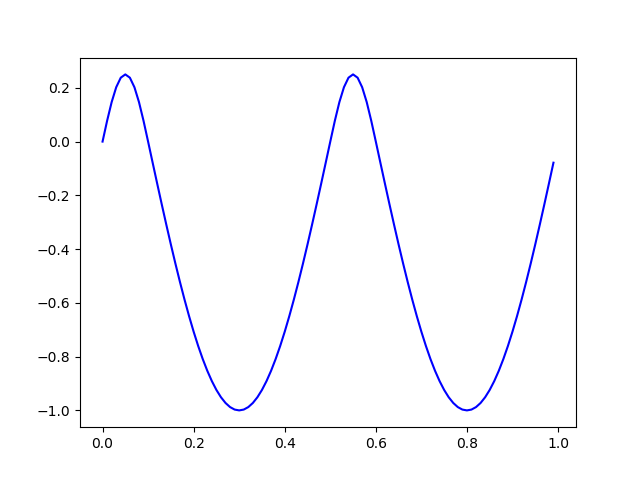

A Jupyter Widget

A Jupyter Widget

draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot


ZeroDivisionError: float division by zero

draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot
draw plot


In [28]:
%matplotlib notebook
waveSlider = widgets.FloatSlider(description='wave', min = 0, max = 1.0, value = 0.0)
shapeSlider = widgets.FloatSlider(description='shape', min = 0, max = 1.0, value = 0.5)

wave = 0.0
shape = 0.5
fig,ax = plt.subplots(1,1)
plt.ylim(-1.0, 1.0)
ax.set_ylim(-1.5, 1.5)
plt.show()

def sig(x):
    if wave < 0.5:
        r = mapRange(wave, 0, 0.5, 0, 1)
        return (1 - r) * balsin(x, shape) + r * baltri(x, shape)
    else:
        r = mapRange(wave, 0.5, 1.0, 0, 1)
        return (1 - r) * baltri(x, shape) + r * balsqr(x, shape)

def drawPlot():
    print('draw plot')
    f = 2.0;
    xs = [x / 100 for x in range(0, 100)]
    ys = [sig(2 * pi * x * f) for x in xs]
    ax.clear()
    ax.plot(xs, ys, 'b');
    plt.draw()

def onWaveChange(change):
    global wave
    wave = change['new']
    drawPlot()
    
def onShapeChange(change):
    global shape
    shape = change['new']
    drawPlot()
    
waveSlider.observe(onWaveChange, names='value')
shapeSlider.observe(onShapeChange, names='value')
display(waveSlider, shapeSlider)
plt.show()
drawPlot()